# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations:

* From Max Temperature vs. Latitude scatter plot and linear regression, we find that temperatires get higher when it is closer to the equator.
* The sample dataset has more cities in the northern hemisphere than the southern hemisphere. It is likely because there are more continents in the northern hemisphere than the sorthern hemisphere. The probability of picking cities in the northern hemisphere is higher.
* There is no strong relationship between latitude and cloudiness.
* There is no strong relationship between latitude and windspeed. However, one city around +80 latitude in the northern hemisphere shows significantly stronger wind at the time the data was pulled.

In [ ]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [69]:
city_name=[]
lat=[]         
lng=[]          
max_temp=[]   
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]     
date=[]

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for i in range(len(cities)):
    response = requests.get(query_url + cities[i]).json()
    try:
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"Processing record {i}: {cities[i]}")
    except:
        print(f"City {cities[i]} not found. skip")

Beginning Data Retrieval
-----------------------------
Processing record 0: thompson
Processing record 1: bagdarin
Processing record 2: umm kaddadah
Processing record 3: bredasdorp
Processing record 4: micheweni
Processing record 5: fukue
Processing record 6: port alfred
Processing record 7: barrow
Processing record 8: albany
Processing record 9: upernavik
Processing record 10: rikitea
Processing record 11: kodiak
Processing record 12: punta arenas
Processing record 13: qaanaaq
Processing record 14: bluff
City belushya guba not found. skip
Processing record 16: iqaluit
Processing record 17: gorontalo
Processing record 18: butaritari
Processing record 19: castro
Processing record 20: kapaa
Processing record 21: atuona
Processing record 22: airai
Processing record 23: carballo
Processing record 24: victoria
Processing record 25: busselton
Processing record 26: puerto ayora
Processing record 27: mataura
Processing record 28: hamina
Processing record 29: tuktoyaktuk
City ruatoria not found

In [59]:
len(wind_speed)


551

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [71]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,59.00,100,75,4.14,CA,1594709574
1,Bagdarin,54.43,113.60,73.96,69,50,4.94,RU,1594709574
2,Umm Kaddadah,13.60,26.69,85.86,52,0,14.29,SD,1594709574
3,Bredasdorp,-34.53,20.04,46.40,93,100,16.11,ZA,1594709574
4,Micheweni,-4.97,39.83,80.11,70,0,11.56,TZ,1594709575


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
weather_data.loc[weather_data["Humidity"]>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [73]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,21.011470,25.078984,69.630980,68.702359,49.753176,8.100073,1.594710e+09
std,33.440165,89.954467,15.280114,22.143301,40.878410,6.023127,1.573678e+02
min,-54.800000,-179.170000,28.400000,3.000000,0.000000,0.250000,1.594709e+09
25%,-6.090000,-53.565000,59.000000,55.500000,1.000000,4.180000,1.594710e+09
50%,26.330000,31.870000,71.600000,73.000000,49.000000,6.930000,1.594710e+09
75%,49.075000,103.915000,80.600000,87.000000,91.000000,10.515000,1.594710e+09
max,78.220000,179.320000,109.400000,100.000000,100.000000,66.660000,1.594710e+09


In [74]:
#  Get the indices of cities that have humidity over 100%.


In [75]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [77]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
weather_data.to_csv("../output_data/weather_data.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

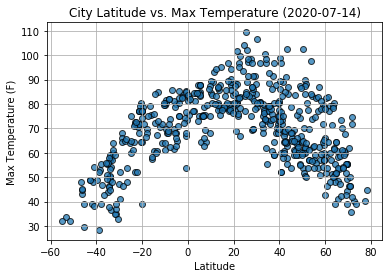

In [135]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2020-07-14)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

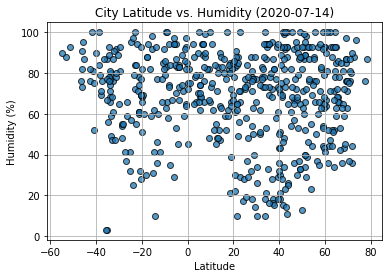

In [83]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2020-07-14)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

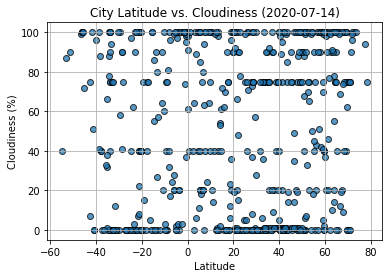

In [84]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2020-07-14)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

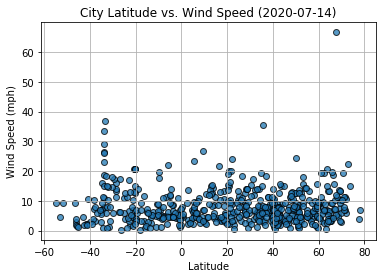

In [85]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2020-07-14)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/lat_windspeed.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [94]:
# Create Northern and Southern Hemisphere DataFrames
northern=weather_data.loc[weather_data["Lat"]>=0.0]
northern.reset_index(inplace=True)

southern=weather_data.loc[weather_data["Lat"]<0.0]
southern.reset_index(inplace=True)

,index,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,3,Bredasdorp,-34.53,20.04,46.40,93,100,16.11,ZA,1594709574
1,4,Micheweni,-4.97,39.83,80.11,70,0,11.56,TZ,1594709575
2,6,Port Alfred,-33.59,26.89,54.12,59,94,36.95,ZA,1594709575
3,10,Rikitea,-23.12,-134.97,72.72,84,100,16.91,PF,1594709575
4,12,Punta Arenas,-53.15,-70.92,33.80,88,87,4.70,CL,1594709575
...,...,...,...,...,...,...,...,...,...,...
160,528,Chegutu,-18.13,30.14,66.40,30,0,0.36,ZW,1594709638
161,535,Te Anau,-45.42,167.72,39.15,87,72,1.25,NZ,1594709404
162,544,Talcahuano,-36.72,-73.12,42.80,87,0,5.82,CL,1594709641
163,547,Zastron,-30.30,27.08,33.03,89,100,17.87,ZA,1594709641


In [124]:
def plot_linear_regression(geo, x, y, x_label, y_label, location):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The r-squared is: {rvalue}")
    
    regress = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    fig_name=f"{geo.title()} Hemisphere - {y_label} vs. {x_label} Linear Regression"
    plt.scatter(x,y)
    plt.plot(x,regress,"r-")
    plt.annotate(line_eq, location, fontsize=15, color="red")
    plt.title(fig_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig(f"../output_data/{fig_name}.png")
    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6255739718981959


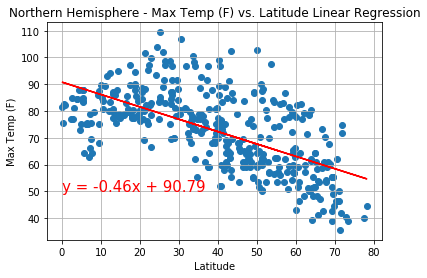

In [125]:
geo="northern"
x="Lat"
y="Max Temp"
x_label="Latitude"
y_label="Max Temp (F)"
location=(0,50)
plot_linear_regression(geo, northern[x], northern[y], x_label, y_label, location)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7774302685929855


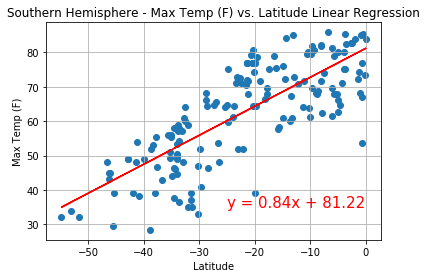

In [126]:
geo="southern"
x="Lat"
y="Max Temp"
x_label="Latitude"
y_label="Max Temp (F)"
location=(-25,35)
plot_linear_regression(geo, southern[x], southern[y], x_label, y_label, location)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.005519997135175819


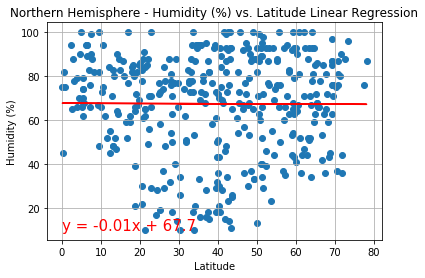

In [127]:
geo="northern"
x="Lat"
y="Humidity"
x_label="Latitude"
y_label= "Humidity (%)"
location=(0,10)
plot_linear_regression(geo, northern[x], northern[y], x_label, y_label, location)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.015009705390615817


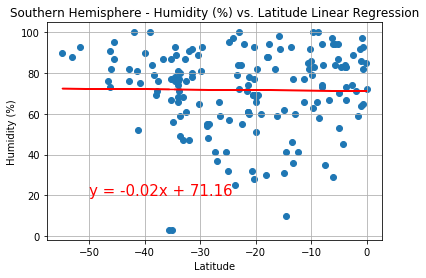

In [128]:
geo="southern"
x="Lat"
y="Humidity"
x_label="Latitude"
y_label= "Humidity (%)"
location=(-50,20)
plot_linear_regression(geo, southern[x], southern[y], x_label, y_label, location)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12274332075105575


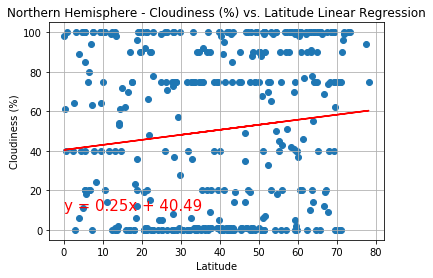

In [129]:
geo="northern"
x="Lat"
y="Cloudiness"
x_label="Latitude"
y_label= "Cloudiness (%)"
location=(0,10)
plot_linear_regression(geo, northern[x], northern[y], x_label, y_label, location)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007358068947367121


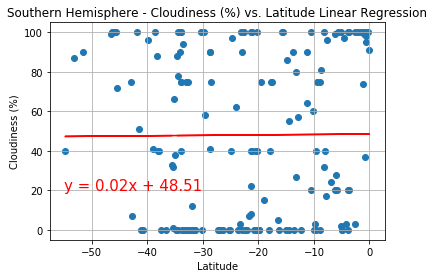

In [131]:
geo="southern"
x="Lat"
y="Cloudiness"
x_label="Latitude"
y_label= "Cloudiness (%)"
location=(-55,20)
plot_linear_regression(geo, southern[x], southern[y], x_label, y_label, location)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05927287772984928


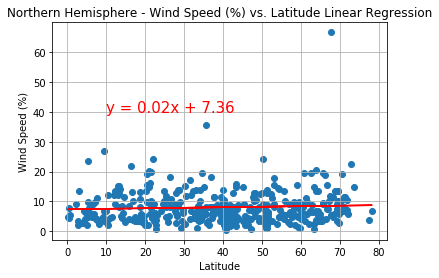

In [132]:
geo="northern"
x="Lat"
y="Wind Speed"
x_label="Latitude"
y_label= "Wind Speed (%)"
location=(10,40)
plot_linear_regression(geo, northern[x], northern[y], x_label, y_label, location)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.12923172324036014


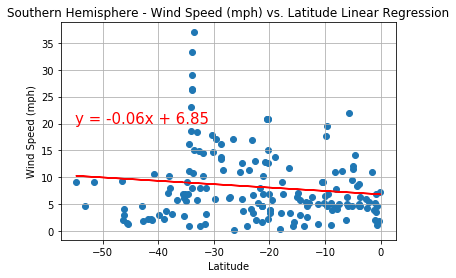

In [134]:
geo="southern"
x="Lat"
y="Wind Speed"
x_label="Latitude"
y_label= "Wind Speed (mph)"
location=(-55,20)
plot_linear_regression(geo, southern[x], southern[y], x_label, y_label, location)